## Setup imports

In [1]:
import os
import json

from monai.apps.nnunet import nnUNetV2Runner, analyze_data
from monai.config import print_config

print_config()

MONAI version: 1.3.0
Numpy version: 1.26.0
Pytorch version: 2.1.1
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 865972f7a791bf7b42efbcd87c8402bd865b329e
MONAI __file__: c:\Users\<username>\miniforge3\envs\p310-torch\lib\site-packages\monai\__init__.py

Optional dependencies:
Pytorch Ignite version: NOT INSTALLED or UNKNOWN VERSION.
ITK version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 5.1.0
scikit-image version: 0.22.0
scipy version: 1.11.3
Pillow version: 10.0.1
Tensorboard version: 2.15.1
gdown version: NOT INSTALLED or UNKNOWN VERSION.
TorchVision version: 0.16.1
tqdm version: 4.66.1
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 5.9.5
pandas version: 2.1.3
einops version: 0.7.0
transformers version: NOT INSTALLED or UNKNOWN VERSION.
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: NOT INSTALLED or UNKNOWN VERSION.
clearml version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the

# setup working dir and dataset

In [2]:
work_dir = "D:\\Files\\Projects\\MAIA\\UdG\\MISA\\Project\\nnunetv2"
dataroot_dir = os.path.join(work_dir, "dataset")
datalist_file = os.path.join(work_dir, "misa_datalist.json")
datalist = json.load(open(datalist_file, "r"))

In [3]:
analyze_data(datalist, dataroot_dir)

2024-01-11 15:41:48,170 - INFO - num_input_channels: 1
2024-01-11 15:41:49,188 - INFO - num_foreground_classes: 3


(1, 3)

## Run nnUNetV2

In [4]:
runner = nnUNetV2Runner(
    work_dir=work_dir,
    input_config={
        "modality": "MRI",
        "datalist": datalist_file,
        "dataroot": dataroot_dir,
    },
)

In [5]:
runner.run()

2023-12-31 16:52:06,351 - INFO - num_input_channels: 1
2023-12-31 16:52:07,205 - INFO - num_foreground_classes: 3
2023-12-31 16:52:07,210 - INFO - converting data section: training...


100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

2023-12-31 16:52:12,404 - INFO - converting data section: testing...



100%|██████████| 8/8 [00:02<00:00,  3.12it/s]

2023-12-31 16:52:15,094 - INFO - Fingerprint extraction...


Dataset001_dataset
Using <class 'nnunetv2.imageio.simpleitk_reader_writer.SimpleITKIO'> as reader/writer


100%|██████████| 10/10 [00:02<00:00,  3.91it/s]


2023-12-31 16:52:20,300 - INFO - Experiment planning...
2D U-Net configuration:
{'data_identifier': 'nnUNetPlans_2d', 'preprocessor_name': 'DefaultPreprocessor', 'batch_size': 45, 'patch_size': array([160, 160]), 'median_image_size_in_voxels': array([139. , 144.5]), 'spacing': array([0.9375, 0.9375]), 'normalization_schemes': ['ZScoreNormalization'], 'use_mask_for_norm': [True], 'UNet_class_name': 'PlainConvUNet', 'UNet_base_num_features': 32, 'n_conv_per_stage_encoder': (2, 2, 2, 2, 2, 2), 'n_conv_per_stage_decoder': (2, 2, 2, 2, 2), 'num_pool_per_axis': [5, 5], 'pool_op_kernel_sizes': [[1, 1], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]], 'conv_kernel_sizes': [[3, 3], [3, 3], [3, 3], [3, 3], [3, 3], [3, 3]], 'unet_max_num_features': 512, 'resampling_fn_data': 'resample_data_or_seg_to_shape', 'resampling_fn_seg': 'resample_data_or_seg_to_shape', 'resampling_fn_data_kwargs': {'is_seg': False, 'order': 3, 'order_z': 0, 'force_separate_z': None}, 'resampling_fn_seg_kwargs': {'is_seg': True, '

100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


Configuration: 3d_fullres...


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


Configuration: 3d_lowres...
INFO: Configuration 3d_lowres not found in plans file nnUNetPlans.json of dataset Dataset001_dataset. Skipping.
2023-12-31 16:52:37,224 - INFO - number of GPUs is 1, device ids are (0,)
Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################


This is the configuration used by this training:
Configuration name: 3d_fullres
 {'data_identifier': 'nnUNetPlans_3d_fullres', 'preprocessor_name': 'DefaultPreprocessor', 'batch_size': 2, 'patch_size': [112, 128, 160], 'median_image_size_in_voxels': [115.0, 139.0, 144.5], 'spacing': [1.5, 0.9375, 0.9375], 'normalization_schemes': ['ZScoreNormalization'], 'use

KeyboardInterrupt: 

In [5]:
runner.train(continue_training=True)

2024-01-10 09:07:51,758 - INFO - number of GPUs is 1, device ids are (0,)
Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################


This is the configuration used by this training:
Configuration name: 3d_fullres
 {'data_identifier': 'nnUNetPlans_3d_fullres', 'preprocessor_name': 'DefaultPreprocessor', 'batch_size': 2, 'patch_size': [112, 128, 160], 'median_image_size_in_voxels': [115.0, 139.0, 144.5], 'spacing': [1.5, 0.9375, 0.9375], 'normalization_schemes': ['ZScoreNormalization'], 'use_mask_for_norm': [True], 'UNet_class_name': 'PlainConvUNet', 'UNet_base_num_features': 32, 'n_conv_per_stage_encoder': [2, 2, 2, 2, 2, 2], '

RuntimeError: Requested configuration 3d_lowres not found in plans. Available configurations: ['2d', '3d_fullres']

In [6]:
runner.find_best_configuration()

Configuration 3d_lowres not found in plans nnUNetPlans.
Inferred plans file: D:\Files\Projects\MAIA\UdG\MISA\Project\nnunetv2\nnUNet_preprocessed\Dataset001_dataset\nnUNetPlans.json.
Configuration 3d_cascade_fullres not found in plans nnUNetPlans.
Inferred plans file: D:\Files\Projects\MAIA\UdG\MISA\Project\nnunetv2\nnUNet_preprocessed\Dataset001_dataset\nnUNetPlans.json.

***All results:***
nnUNetTrainer__nnUNetPlans__2d: 0.9330357486433947
nnUNetTrainer__nnUNetPlans__3d_fullres: 0.932586311810331
ensemble___nnUNetTrainer__nnUNetPlans__2d___nnUNetTrainer__nnUNetPlans__3d_fullres___0_1_2_3_4: 0.9362938720075822

*Best*: ensemble___nnUNetTrainer__nnUNetPlans__2d___nnUNetTrainer__nnUNetPlans__3d_fullres___0_1_2_3_4: 0.9362938720075822

***Determining postprocessing for best model/ensemble***
Results were improved by removing all but the largest foreground region. Mean dice before: 0.93629 after: 0.93629
Removing all but the largest component for 1 did not improve results! Dice before: 0.

In [5]:
runner.predict_ensemble_postprocessing()


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 8 cases in the source folder
I am process 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 8 cases that I would like to predict
using pin_memory on device 0

Predicting case_10:
perform_everything_on_gpu: True
Prediction done, transferring to CPU if needed
sending off prediction to background worker for resampling and export
done with case_10

Predicting case_11:
perform_everything_on_gpu: True
Prediction done, transferring to CPU if needed
sending off prediction to background worker for resampling and export
done with case_11

Predicting case_12:
perform_ever

## Get validation results for report

In [1]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
def calculate_dice_score(labels_seg, labels_gt, print_score=True):
    dice_score = {}
    
    # please check what are the actual label values for the dataset you are working with

    label_seg_csf = labels_seg == 1
    label_seg_gm = labels_seg == 2
    label_seg_wm = labels_seg == 3

    label_gt_csf = labels_gt == 1
    label_gt_gm = labels_gt == 2
    label_gt_wm = labels_gt == 3

    dice_score['csf'] = np.sum(label_gt_csf[label_seg_csf]) * 2.0 / (np.sum(label_gt_csf) + np.sum(label_seg_csf))
    dice_score['gm'] = np.sum(label_gt_gm[label_seg_gm]) * 2.0 / (np.sum(label_gt_gm) + np.sum(label_seg_gm))
    dice_score['wm'] = np.sum(label_gt_wm[label_seg_wm]) * 2.0 / (np.sum(label_gt_wm) + np.sum(label_seg_wm))

    if print_score:
        print('Dice scores:')
        for key, value in dice_score.items():
            print(f'{key}: {value:.4f}')
            
        print(f'Average: {np.mean(list(dice_score.values())):.4f}')

    return dice_score

In [11]:
def calculate_hausdorff_distance(labels_pred, labels_gt, print_score=True):
    """
    Calculate the Hausdorff distance for each label in the predicted and ground truth segmentation.

    Parameters
    ----------
    labels_pred : numpy array
        Predicted segmentation labels.
    labels_gt : numpy array
        Ground truth segmentation labels.
    print_score : bool, optional
        Whether to print the Hausdorff distance for each label, by default True.

    Returns
    -------
    hd_score : dict
        Dictionary containing the Hausdorff distance for each label.
    """
    # Convert numpy arrays to SimpleITK images
    pred_image = sitk.GetImageFromArray(labels_pred)
    gt_image = sitk.GetImageFromArray(labels_gt)

    # Create the Hausdorff distance filter
    hd_filter = sitk.HausdorffDistanceImageFilter()

    # Calculate the Hausdorff distance for each label
    hd_scores = {}
    for label, label_name in zip([1, 2, 3], ['csf', 'gm', 'wm']):
        pred_label = sitk.BinaryThreshold(pred_image, label, label)
        gt_label = sitk.BinaryThreshold(gt_image, label, label)

        hd_filter.Execute(pred_label, gt_label)
        hd_scores[label_name] = hd_filter.GetHausdorffDistance()
    
    if print_score:
        print('Hausdorff distance:')
        for key, value in hd_scores.items():
            print(f'{key}: {value:.4f}')
        
        print(f'Average: {np.mean(list(hd_scores.values())):.4f}')

    return hd_scores

In [17]:
def calculate_avd(pred_labels, gt_labels, print_scores=True):
    """
    Calculate the average volumetric difference (AVD) per label between predicted and ground truth labels.

    Parameters
    ----------
    pred_labels : numpy.ndarray
        Predicted segmentation labels.
    gt_labels : numpy.ndarray
        Ground truth segmentation labels.
    print_scores : bool, optional
        Whether to print the AVD scores per label, by default True.

    Returns
    -------
    avd_scores : dict
        Dictionary containing the average volumetric difference (AVD) score per label.
    """
    avd_scores = {}
    
    for label, label_name in zip([1, 2, 3], ['csf', 'gm', 'wm']):
        pred_label = pred_labels == label
        gt_label = gt_labels == label

        avd_scores[label_name] = np.abs(np.sum(pred_label) - np.sum(gt_label)) / np.sum(gt_label)

    if print_scores:
        print("Average Volumetric Difference (AVD) per label:")
        for label, score in avd_scores.items():
            print(f"Label {label}: {score:.4f}")
            
        print(f"Average: {np.mean(list(avd_scores.values())):.4f}")

    return avd_scores


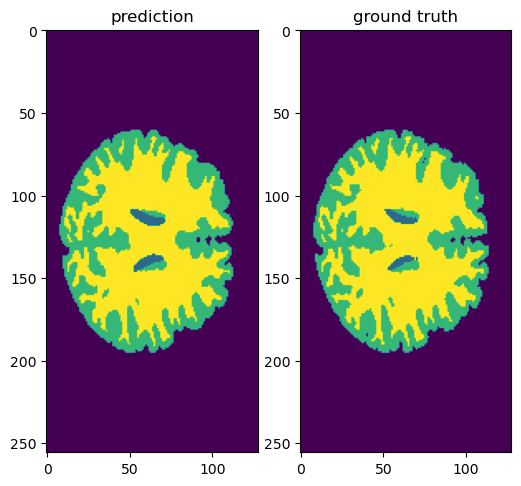

Dice scores:
csf: 0.9125
gm: 0.9545
wm: 0.9622
Average: 0.9431

Hausdorff distance:
csf: 10.0499
gm: 7.8740
wm: 5.7446
Average: 7.8895

Average Volumetric Difference (AVD) per label:
Label csf: 0.0325
Label gm: 0.0142
Label wm: 0.0054
Average: 0.0174


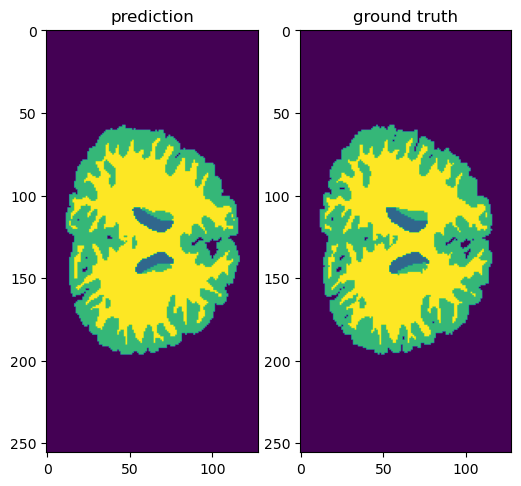

Dice scores:
csf: 0.8998
gm: 0.9470
wm: 0.9511
Average: 0.9326

Hausdorff distance:
csf: 10.2470
gm: 6.7082
wm: 5.3852
Average: 7.4468

Average Volumetric Difference (AVD) per label:
Label csf: 0.1413
Label gm: 0.0082
Label wm: 0.0465
Average: 0.0653


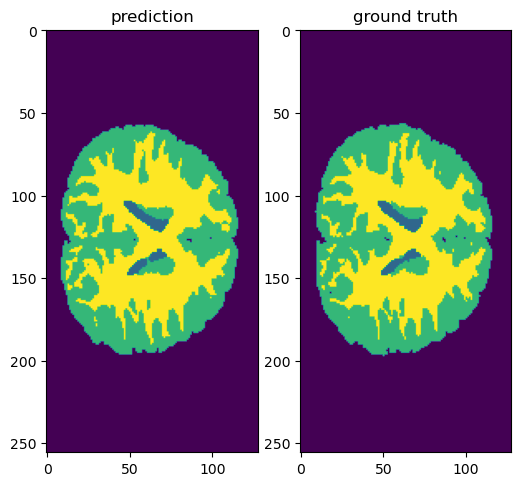

Dice scores:
csf: 0.9069
gm: 0.9463
wm: 0.9312
Average: 0.9281

Hausdorff distance:
csf: 10.4403
gm: 11.0454
wm: 8.6023
Average: 10.0293

Average Volumetric Difference (AVD) per label:
Label csf: 0.0209
Label gm: 0.0573
Label wm: 0.0547
Average: 0.0443


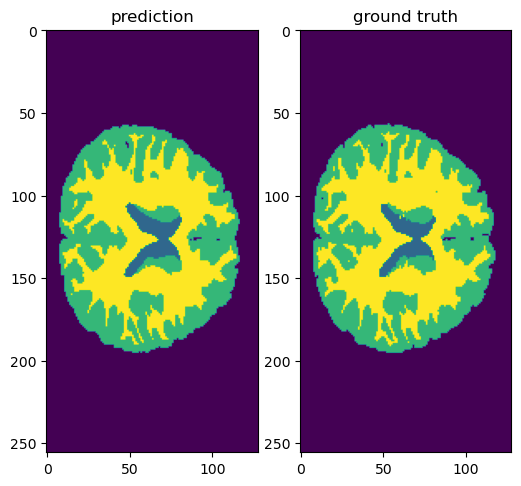

Dice scores:
csf: 0.9376
gm: 0.9652
wm: 0.9601
Average: 0.9543

Hausdorff distance:
csf: 4.2426
gm: 5.0990
wm: 6.0000
Average: 5.1139

Average Volumetric Difference (AVD) per label:
Label csf: 0.0777
Label gm: 0.0128
Label wm: 0.0378
Average: 0.0428


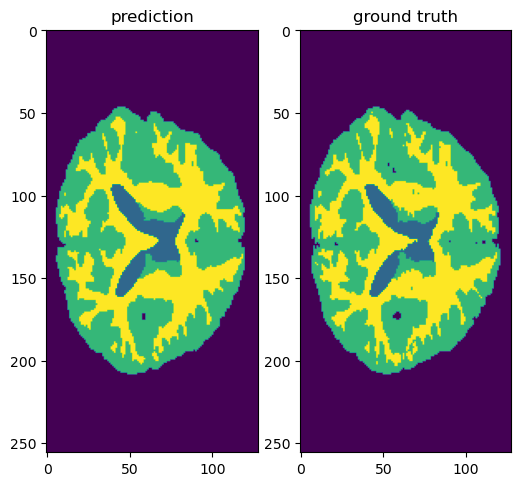

Dice scores:
csf: 0.9530
gm: 0.9565
wm: 0.9464
Average: 0.9520

Hausdorff distance:
csf: 11.9164
gm: 8.7750
wm: 7.8740
Average: 9.5218

Average Volumetric Difference (AVD) per label:
Label csf: 0.0083
Label gm: 0.0001
Label wm: 0.0402
Average: 0.0162

##################################################
AVERAGE SCORES FOR ALL CASES
##################################################

Average dice scores for all cases:
csf: 0.9220
gm: 0.9539
wm: 0.9502
Total average: 0.9420

Average Hausdorff scores for all cases:
csf: 9.3792
gm: 7.9003
wm: 6.7212
Total average: 8.0003

Average AVD scores for all cases:
csf: 0.0561
gm: 0.0185
wm: 0.0369
Total average: 0.0372


In [29]:
PREDICTIONS_DIR = "D:\\Files\\Projects\\MAIA\\UdG\\MISA\\Project\\nnunetv2\\nnUNet_trained_models\\Dataset001_dataset\\ensemble_predictions_postprocessed"
ORIG_VAL_DIR = "D:\\Files\\Projects\\MAIA\\UdG\\MISA\\Project\\nnunetv2\\dataset\\Validation_Set"

val_cases = [13, 14, 15, 16, 17]
val_cases_orig = [11, 12, 13, 14, 17]

dice_scores = []
hd_scores = []
avd_scores = []

y_pred = []
y_true = []

for case_pred, case_orig in zip(val_cases, val_cases_orig):
    pred_labels = sitk.ReadImage(
        os.path.join(PREDICTIONS_DIR, f"case_{case_pred}.nii.gz")
    )
    
    gt_labels = sitk.ReadImage(
        os.path.join(ORIG_VAL_DIR, f"IBSR_{case_orig}", f"IBSR_{case_orig}_seg.nii.gz")
    )
    
    y_pred.append(sitk.GetArrayFromImage(pred_labels).transpose(2, 1, 0))
    y_true.append(sitk.GetArrayFromImage(gt_labels).transpose(2, 1, 0))
    
    # plot the data
    plt.figure("check", (6, 6))
    plt.subplot(1, 2, 1)
    plt.title("prediction")
    plt.imshow(sitk.GetArrayFromImage(pred_labels).transpose(0, 2, 1)[150, :, :])
    plt.subplot(1, 2, 2)
    plt.title("ground truth")
    plt.imshow(sitk.GetArrayFromImage(gt_labels).transpose(0, 2, 1)[150, :, :])
    plt.show()
    
    # calculate the dice score
    dice_score = calculate_dice_score(
        sitk.GetArrayFromImage(pred_labels),
        sitk.GetArrayFromImage(gt_labels)
    )
    dice_scores.append(dice_score)
    
    print()
    
    # calculate the Hausdorff distance
    hd_score = calculate_hausdorff_distance(
        sitk.GetArrayFromImage(pred_labels),
        sitk.GetArrayFromImage(gt_labels)
    )
    hd_scores.append(hd_score)
    
    print()
    
    # calculate the volumetric difference    
    avd_score = calculate_avd(
        sitk.GetArrayFromImage(pred_labels),
        sitk.GetArrayFromImage(gt_labels)
    )
    avd_scores.append(avd_score)

print()
print("#" * 50)
print("AVERAGE SCORES FOR ALL CASES")
print("#" * 50)

# calculate the average for csf, gm, and wm for dice scores
print("\nAverage dice scores for all cases:")
average_dice_score = {}
for key in dice_scores[0].keys():
    average_dice_score[key] = np.mean([dice_score[key] for dice_score in dice_scores])
for key, value in average_dice_score.items():
    print(f"{key}: {value:.4f}")
print(f"Total average: {np.mean(list(average_dice_score.values())):.4f}")

# calculate the average for csf, gm, and wm for Hausdorff scores
print("\nAverage Hausdorff scores for all cases:")
average_hd_score = {}
for key in hd_scores[0].keys():
    average_hd_score[key] = np.mean([hd_score[key] for hd_score in hd_scores])
for key, value in average_hd_score.items():
    print(f"{key}: {value:.4f}")
print(f"Total average: {np.mean(list(average_hd_score.values())):.4f}")

# calculate the average for csf, gm, and wm for AVD scores
print("\nAverage AVD scores for all cases:")
average_avd_score = {}
for key in avd_scores[0].keys():
    average_avd_score[key] = np.mean([avd_score[key] for avd_score in avd_scores])
for key, value in average_avd_score.items():
    print(f"{key}: {value:.4f}")
print(f"Total average: {np.mean(list(average_avd_score.values())):.4f}")



In [22]:
import pandas as pd

df_dice_orig = pd.DataFrame(dice_scores)
df_dice = df_dice_orig.copy()
df_dice['average'] = df_dice_orig.mean(axis=1)
df_dice['std'] = df_dice_orig.std(axis=1)

df_hausdorff_orig = pd.DataFrame(hd_scores)
df_hausdorff = df_hausdorff_orig.copy()
df_hausdorff['average'] = df_hausdorff_orig.mean(axis=1)
df_hausdorff['std'] = df_hausdorff_orig.std(axis=1)

df_avd_orig = pd.DataFrame(avd_scores)
df_avd = df_avd_orig.copy()
df_avd['average'] = df_avd_orig.mean(axis=1)
df_avd['std'] = df_avd_orig.std(axis=1)

df_scores = pd.concat([df_dice, df_hausdorff, df_avd], axis=1)
df_scores.index = val_cases_orig

# rename the columns
df_scores.columns = [
    'dice_csf', 'dice_gm', 'dice_wm', 'dice_average', 'dice_std',
    'hd', 'hd_gm', 'hd_wm', 'hd_average', 'hd_std',
    'avd_csf', 'avd_gm', 'avd_wm', 'avd_average', 'avd_std'
]

# export to excel
df_scores.to_excel('results/exp04_scores.xlsx')

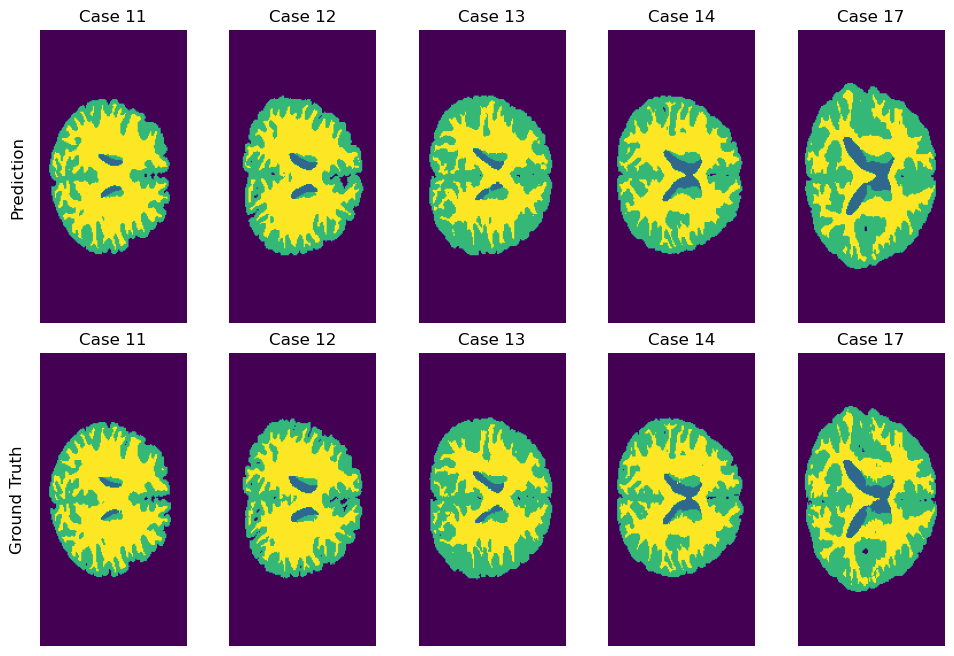

In [30]:
import matplotlib.pyplot as plt

n_slice = 150

# Create subplots with 3 rows and the number of columns based on the number of images
fig, axes = plt.subplots(2, len(y_true), figsize=(12, 8))

# Add vertical text to indicate original, prediction, and ground truth
axes[0, 0].text(-20, 128, "Prediction", rotation="vertical", va="center", ha="center", fontsize=12)
axes[1, 0].text(-20, 128, "Ground Truth", rotation="vertical", va="center", ha="center", fontsize=12)

# Plot predictions
for i in range(len(y_pred)):
    axes[0, i].imshow(y_pred[i][:, :, n_slice])
    axes[0, i].set_title(f"Case {val_cases_orig[i]}")
    axes[0, i].axis("off")

# Plot ground truth
for i in range(len(y_true)):
    axes[1, i].imshow(y_true[i][:, :, n_slice])
    axes[1, i].set_title(f"Case {val_cases_orig[i]}")
    axes[1, i].axis("off")

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Show the plot
plt.show()